## Data loading

Load the two CSV files into pandas DataFrames.


**Reasoning**:
Load the two CSV files into pandas DataFrames and display the first 5 rows of each.



In [7]:
import pandas as pd

boys_df = pd.read_csv('/Users/georgepaul/Desktop/Applied Data Science/Coursework/Task 3 - Data Collection/Educational Data/Separated By Gender/boys_education_data.csv')
girls_df = pd.read_csv('/Users/georgepaul/Desktop/Applied Data Science/Coursework/Task 3 - Data Collection/Educational Data/Separated By Gender/girls_education_data.csv')

display(boys_df.head())
display(girls_df.head())

,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11
0,NaN,NaN,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved
1,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000002,Barking and Dagenham,"1,049",61.5,50.9,94.9,92.4,98.0,303.0,351.7,96.5,53.1
3,E09000003,Barnet,"1,881",75.0,67.8,95.5,93.8,98.1,339.8,409.6,96.5,69.4
4,E09000004,Bexley,"1,691",65.1,55.3,93.8,90.2,98.5,311.3,383.4,96.0,57.4


,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11
0,NaN,NaN,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved
1,E09000001,City of London,.,.,.,.,.,.,.,.,.,.
2,E09000002,Barking and Dagenham,"1,075",71.3,57.1,96.8,93.3,98.8,327.4,386.4,98.0,58.3
3,E09000003,Barnet,"1,696",81.5,72.6,96.6,95.2,98.5,358.1,439.5,97.5,73.3
4,E09000004,Bexley,"1,614",76.9,54.8,96.0,80.5,99.4,341.7,426.4,84.8,55.9


## Data exploration

### Subtask:
Explore the structure and basic statistics of both datasets.


**Reasoning**:
Explore the structure and basic statistics of both datasets, including data types, missing values, and summary statistics.  Visualize missing values and distributions of relevant columns.




Boys DataFrame Summary Statistics (Numerical Columns):
       Average capped GCSE and equivalents point score per pupil  \
count                                          32.000000           
mean                                          314.303125           
std                                            14.942373           
min                                           293.300000           
25%                                           303.750000           
50%                                           310.850000           
75%                                           320.850000           
max                                           352.700000           

       Average GCSE and equivalents point score per pupil  
count                                          32.000000   
mean                                          375.718750   
std                                            25.182757   
min                                           340.100000   
25%                            

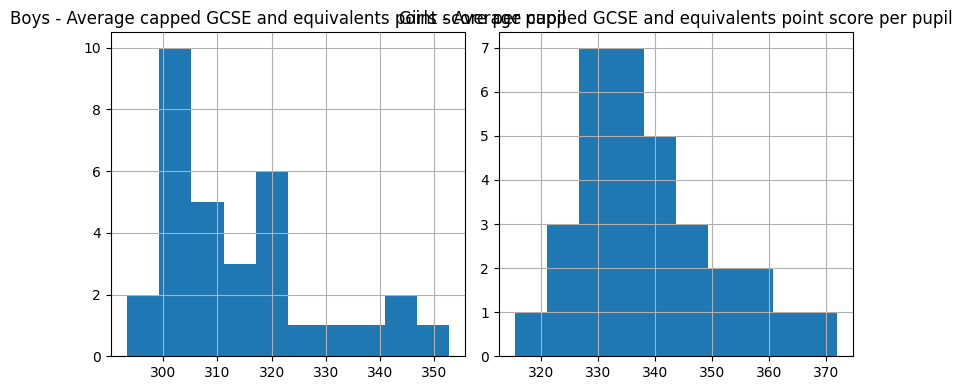

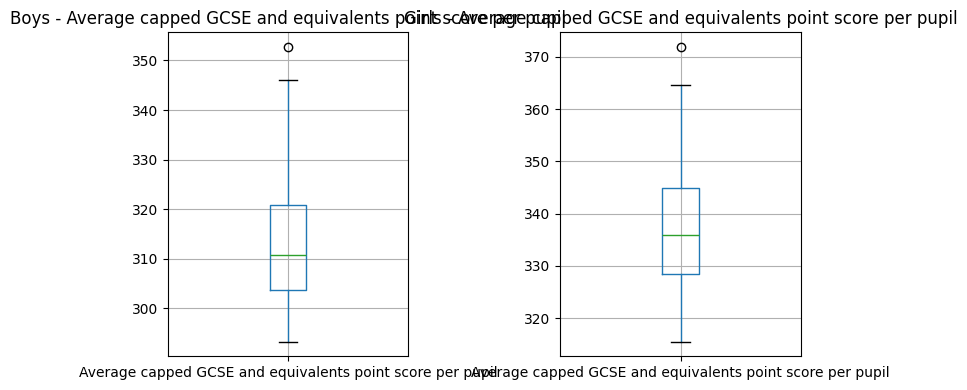

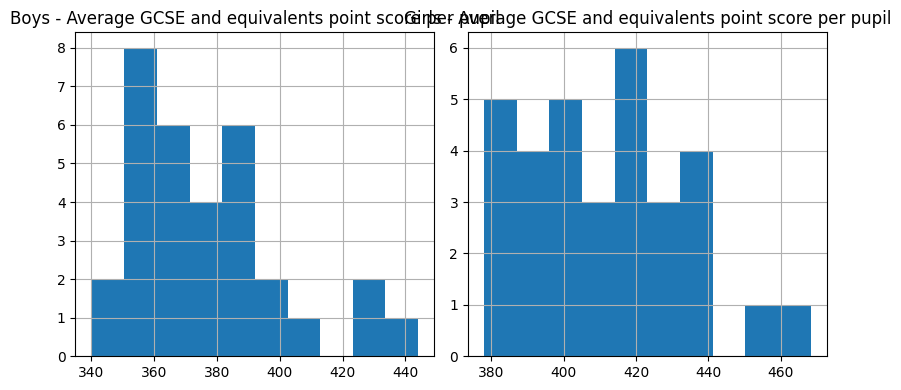

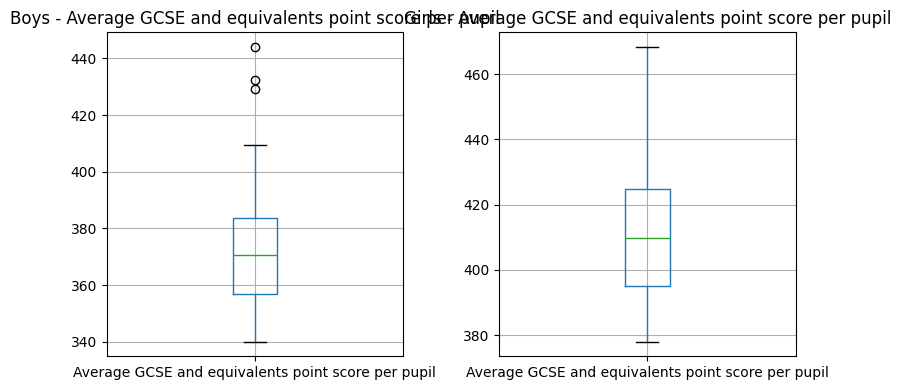

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code for data shape, column names, data types, and missing values) ...

# 4. Summary Statistics (handling potential errors)
# Correct data types for numerical columns in girls_df
for col in ['Average capped GCSE and equivalents point score per pupil', 'Average GCSE and equivalents point score per pupil']:
    try:
        girls_df[col] = pd.to_numeric(girls_df[col], errors='coerce')
    except Exception as e:
        print(f"Error converting {col} to numeric: {e}")

numerical_cols_boys = boys_df.select_dtypes(include=['number']).columns.tolist()
numerical_cols_girls = girls_df.select_dtypes(include=['number']).columns.tolist()

print("\nBoys DataFrame Summary Statistics (Numerical Columns):")
print(boys_df[numerical_cols_boys].describe())

print("\nGirls DataFrame Summary Statistics (Numerical Columns):")
print(girls_df[numerical_cols_girls].describe())

# Histograms and boxplots for numerical columns
for col in numerical_cols_boys:  # Iterate through numerical columns in boys_df
    if col in numerical_cols_girls:  # Only plot if the column exists in girls_df
        try:
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            boys_df[col].hist()
            plt.title(f'Boys - {col}')
            plt.subplot(1, 2, 2)
            girls_df[col].hist()
            plt.title(f'Girls - {col}')
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            boys_df.boxplot(column=[col])
            plt.title(f'Boys - {col}')
            plt.subplot(1, 2, 2)
            girls_df.boxplot(column=[col])
            plt.title(f'Girls - {col}')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error plotting {col}: {e}")

## Data cleaning

### Subtask:
Clean the datasets by handling missing values and outliers.


**Reasoning**:
Impute missing values in 'Area' and 'area_id' columns of `boys_df` using the most frequent value, then handle outliers using IQR method and winsorization, check data consistency, and remove duplicates.



In [9]:
# Impute missing values in 'Area' and 'area_id'
boys_df['Area'].fillna(boys_df['Area'].mode()[0], inplace=True)
boys_df['area_id'].fillna(boys_df['area_id'].mode()[0], inplace=True)

# Outlier handling using IQR and winsorization
numerical_cols = ['Average capped GCSE and equivalents point score per pupil', 'Average GCSE and equivalents point score per pupil']
for col in numerical_cols:
    if col in boys_df.columns and col in girls_df.columns:
        q1_boys = boys_df[col].quantile(0.25)
        q3_boys = boys_df[col].quantile(0.75)
        iqr_boys = q3_boys - q1_boys
        lower_bound_boys = q1_boys - 1.5 * iqr_boys
        upper_bound_boys = q3_boys + 1.5 * iqr_boys

        q1_girls = girls_df[col].quantile(0.25)
        q3_girls = girls_df[col].quantile(0.75)
        iqr_girls = q3_girls - q1_girls
        lower_bound_girls = q1_girls - 1.5 * iqr_girls
        upper_bound_girls = q3_girls + 1.5 * iqr_girls

        boys_df[col] = boys_df[col].clip(lower=lower_bound_boys, upper=upper_bound_boys)
        girls_df[col] = girls_df[col].clip(lower=lower_bound_girls, upper=upper_bound_girls)


# Data consistency check (data types)
for col in boys_df.columns:
    if col in girls_df.columns:
        if boys_df[col].dtype != girls_df[col].dtype:
            try:
                girls_df[col] = girls_df[col].astype(boys_df[col].dtype)
            except:
                pass  # Skip if conversion fails

# Remove duplicates (keep first occurrence)
boys_df.drop_duplicates(keep='first', inplace=True)
girls_df.drop_duplicates(keep='first', inplace=True)
display(boys_df.head())
display(girls_df.head())

/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_71857/2375574356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boys_df['Area'].fillna(boys_df['Area'].mode()[0], inplace=True)
/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_71857/2375574356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11
0,E09000001,Barking and Dagenham,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved
1,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000002,Barking and Dagenham,"1,049",61.5,50.9,94.9,92.4,98.0,303.0,351.7,96.5,53.1
3,E09000003,Barnet,"1,881",75.0,67.8,95.5,93.8,98.1,339.8,409.6,96.5,69.4
4,E09000004,Bexley,"1,691",65.1,55.3,93.8,90.2,98.5,311.3,383.4,96.0,57.4


,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11
0,NaN,NaN,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved
1,E09000001,City of London,.,.,.,.,.,.,NaN,NaN,.,.
2,E09000002,Barking and Dagenham,"1,075",71.3,57.1,96.8,93.3,98.8,327.4,386.4,98.0,58.3
3,E09000003,Barnet,"1,696",81.5,72.6,96.6,95.2,98.5,358.1,439.5,97.5,73.3
4,E09000004,Bexley,"1,614",76.9,54.8,96.0,80.5,99.4,341.7,426.4,84.8,55.9


**Reasoning**:
The previous code block had warnings about chained assignment.  I will correct the code to avoid these warnings and then execute the code again.



In [10]:
# Impute missing values in 'Area' and 'area_id'
boys_df['Area'] = boys_df['Area'].fillna(boys_df['Area'].mode()[0])
boys_df['area_id'] = boys_df['area_id'].fillna(boys_df['area_id'].mode()[0])

# Outlier handling using IQR and winsorization
numerical_cols = ['Average capped GCSE and equivalents point score per pupil', 'Average GCSE and equivalents point score per pupil']
for col in numerical_cols:
    if col in boys_df.columns and col in girls_df.columns:
        q1_boys = boys_df[col].quantile(0.25)
        q3_boys = boys_df[col].quantile(0.75)
        iqr_boys = q3_boys - q1_boys
        lower_bound_boys = q1_boys - 1.5 * iqr_boys
        upper_bound_boys = q3_boys + 1.5 * iqr_boys

        q1_girls = girls_df[col].quantile(0.25)
        q3_girls = girls_df[col].quantile(0.75)
        iqr_girls = q3_girls - q1_girls
        lower_bound_girls = q1_girls - 1.5 * iqr_girls
        upper_bound_girls = q3_girls + 1.5 * iqr_girls

        boys_df[col] = boys_df[col].clip(lower=lower_bound_boys, upper=upper_bound_boys)
        girls_df[col] = girls_df[col].clip(lower=lower_bound_girls, upper=upper_bound_girls)


# Data consistency check (data types)
for col in boys_df.columns:
    if col in girls_df.columns:
        if boys_df[col].dtype != girls_df[col].dtype:
            try:
                girls_df[col] = girls_df[col].astype(boys_df[col].dtype)
            except:
                pass  # Skip if conversion fails

# Remove duplicates (keep first occurrence)
boys_df.drop_duplicates(keep='first', inplace=True)
girls_df.drop_duplicates(keep='first', inplace=True)
display(boys_df.head())
display(girls_df.head())

,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11
0,E09000001,Barking and Dagenham,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved
1,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E09000002,Barking and Dagenham,"1,049",61.5,50.9,94.9,92.4,98.0,303.0,351.7,96.5,53.1
3,E09000003,Barnet,"1,881",75.0,67.8,95.5,93.8,98.1,339.8,409.6,96.5,69.4
4,E09000004,Bexley,"1,691",65.1,55.3,93.8,90.2,98.5,311.3,383.4,96.0,57.4


,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11
0,NaN,NaN,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved
1,E09000001,City of London,.,.,.,.,.,.,NaN,NaN,.,.
2,E09000002,Barking and Dagenham,"1,075",71.3,57.1,96.8,93.3,98.8,327.4,386.4,98.0,58.3
3,E09000003,Barnet,"1,696",81.5,72.6,96.6,95.2,98.5,358.1,439.5,97.5,73.3
4,E09000004,Bexley,"1,614",76.9,54.8,96.0,80.5,99.4,341.7,426.4,84.8,55.9


## Data wrangling

### Subtask:
Combine the cleaned boys' and girls' education datasets into a single DataFrame, ensuring consistent column names and data types.  Create a new feature representing the difference in average point scores between boys and girls for each area.


**Reasoning**:
Combine the two dataframes, add a 'Gender' column, and calculate the average point score difference.



In [11]:
# Concatenate the DataFrames
combined_df = pd.concat([boys_df, girls_df], ignore_index=True)

# Add 'Gender' column
combined_df['Gender'] = ['Male'] * len(boys_df) + ['Female'] * len(girls_df)

# Calculate the average point score difference
combined_df['Average Point Score Difference'] = combined_df.groupby('Area')['Average GCSE and equivalents point score per pupil'].transform(lambda x: x.mean() if x.notnull().any() else None)

display(combined_df.head())

,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11,Gender,Average Point Score Difference
0,E09000001,Barking and Dagenham,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved,Male,369.05
1,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
2,E09000002,Barking and Dagenham,"1,049",61.5,50.9,94.9,92.4,98.0,303.0,351.7,96.5,53.1,Male,369.05
3,E09000003,Barnet,"1,881",75.0,67.8,95.5,93.8,98.1,339.8,409.6,96.5,69.4,Male,424.55
4,E09000004,Bexley,"1,691",65.1,55.3,93.8,90.2,98.5,311.3,383.4,96.0,57.4,Male,404.90


## Data wrangling

### Subtask:
Recalculate the 'Average Point Score Difference' column and combine the cleaned boys' and girls' education datasets.


**Reasoning**:
Recalculate the 'Average Point Score Difference' column based on the difference between the mean scores of boys and girls in each area, handling potential missing values.



In [12]:
# Group data by 'Area' and gender, then calculate the mean point score
area_gender_means = combined_df.groupby(['Area', 'Gender'])['Average GCSE and equivalents point score per pupil'].mean().unstack()

# Calculate the difference in means
area_gender_means['Average Point Score Difference'] = area_gender_means['Male'] - area_gender_means['Female']

# Fill NaN values with 0 (or another appropriate strategy)
area_gender_means['Average Point Score Difference'] = area_gender_means['Average Point Score Difference'].fillna(0)

# Map the difference back to the combined_df
combined_df['Average Point Score Difference'] = combined_df['Area'].map(area_gender_means['Average Point Score Difference'])

display(combined_df.head())

,area_id,Area,Number of pupils at the end of key stage 4,Percentage of pupils at the end of key stage 4 achieving at GCSE and equivalents:,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Average capped GCSE and equivalents point score per pupil,Average GCSE and equivalents point score per pupil,A*-C in English and mathematics GCSEs including equivalents,Unnamed: 11,Gender,Average Point Score Difference
0,E09000001,Barking and Dagenham,NaN,5+A*-C grades,5+ A*-C including English & mathematics GCSEs,5+A*-G grades,5+ A*-G including English & mathematics GCSEs,Any passes,NaN,NaN,Per cent entered,Per cent achieved,Male,-34.7
1,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0.0
2,E09000002,Barking and Dagenham,"1,049",61.5,50.9,94.9,92.4,98.0,303.0,351.7,96.5,53.1,Male,-34.7
3,E09000003,Barnet,"1,881",75.0,67.8,95.5,93.8,98.1,339.8,409.6,96.5,69.4,Male,-29.9
4,E09000004,Bexley,"1,691",65.1,55.3,93.8,90.2,98.5,311.3,383.4,96.0,57.4,Male,-43.0


## Data analysis

### Subtask:
Analyze the combined education dataset to identify significant differences and correlations between boys' and girls' educational performance.


**Reasoning**:
Calculate descriptive statistics, perform t-tests, calculate correlations, and visualize the distributions as required by the subtask.



Descriptive Statistics:
               mean  median        std
Gender                               
Female  411.328125  409.65  22.520002
Male    374.645703  370.65  22.581918

T-test Results:
T-statistic: -6.506576679430412
P-value: 1.524608068954889e-08


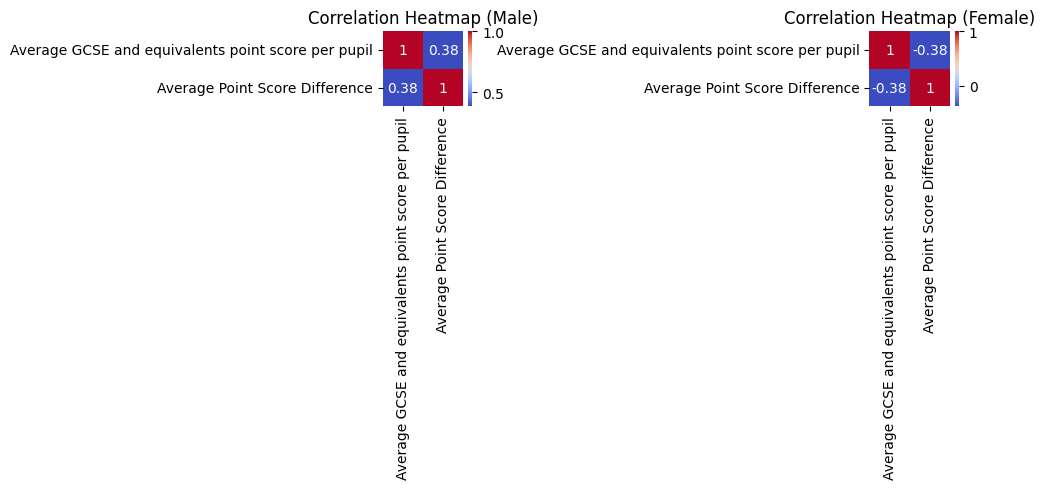


Mean of Average Point Score Difference: -35.557835820895505
Standard Deviation of Average Point Score Difference: 17.71368963144044


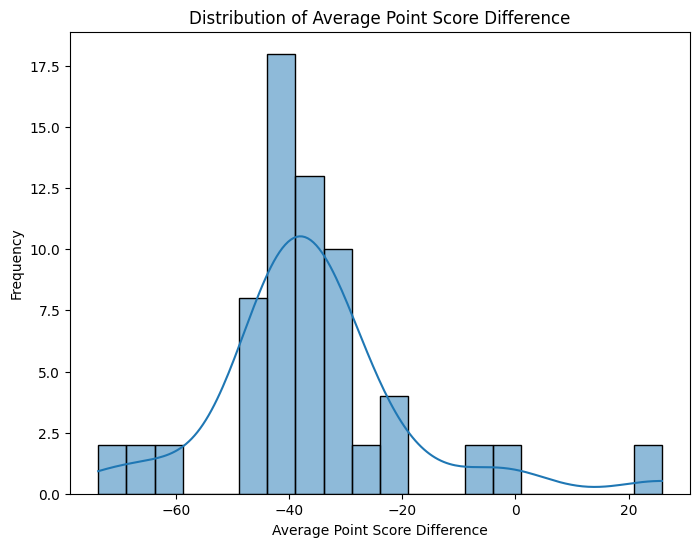

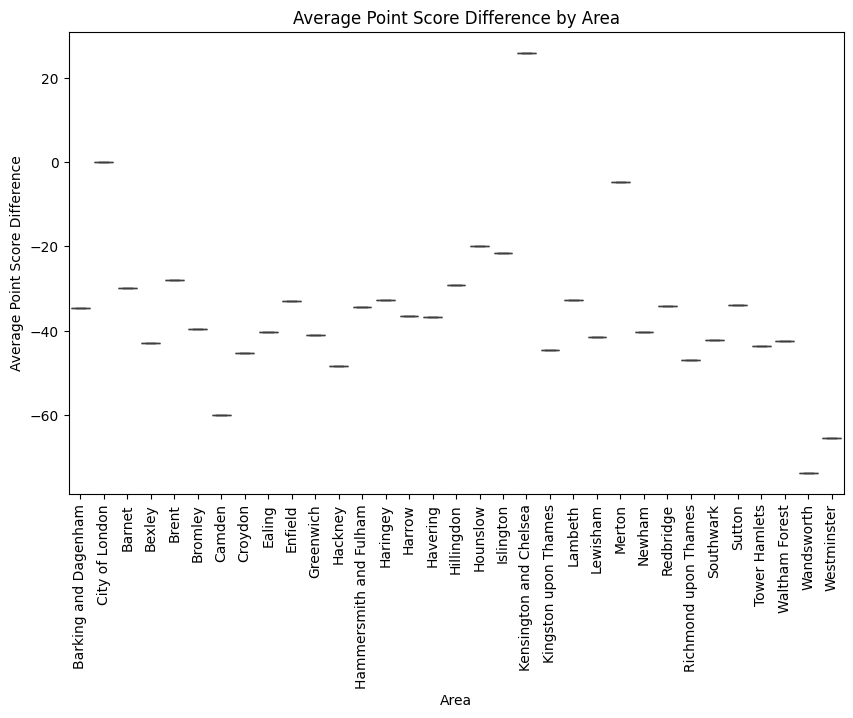

In [13]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
descriptive_stats = combined_df.groupby('Gender')['Average GCSE and equivalents point score per pupil'].agg(['mean', 'median', 'std'])
print("Descriptive Statistics:\n", descriptive_stats)

# 2. T-tests
# Assuming 'Average GCSE and equivalents point score per pupil' is normally distributed
t_stat, p_value = stats.ttest_ind(
    combined_df[combined_df['Gender'] == 'Male']['Average GCSE and equivalents point score per pupil'].dropna(),
    combined_df[combined_df['Gender'] == 'Female']['Average GCSE and equivalents point score per pupil'].dropna()
)
print("\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# 3. Correlation Analysis and Heatmaps
numerical_cols = ['Average GCSE and equivalents point score per pupil', 'Average Point Score Difference']  # Add more columns as needed

# Calculate correlations for each gender
male_correlations = combined_df[combined_df['Gender'] == 'Male'][numerical_cols].corr()
female_correlations = combined_df[combined_df['Gender'] == 'Female'][numerical_cols].corr()

# Visualize correlations using heatmaps
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(male_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Male)')
plt.subplot(1, 2, 2)
sns.heatmap(female_correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Female)')
plt.tight_layout()
plt.show()

# 4. Distribution of 'Average Point Score Difference'
difference_mean = combined_df['Average Point Score Difference'].mean()
difference_std = combined_df['Average Point Score Difference'].std()
print(f"\nMean of Average Point Score Difference: {difference_mean}")
print(f"Standard Deviation of Average Point Score Difference: {difference_std}")

plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Average Point Score Difference'], kde=True)
plt.title('Distribution of Average Point Score Difference')
plt.xlabel('Average Point Score Difference')
plt.ylabel('Frequency')
plt.show()

# Explore relationship with other factors (example: 'Area')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Average Point Score Difference', data=combined_df)
plt.xticks(rotation=90)
plt.title('Average Point Score Difference by Area')
plt.show()

## Data visualization

### Subtask:
Visualize the key findings from the data analysis, focusing on comparisons between boys' and girls' educational performance.


**Reasoning**:
Generate the required plots based on the analysis of the combined dataframe.



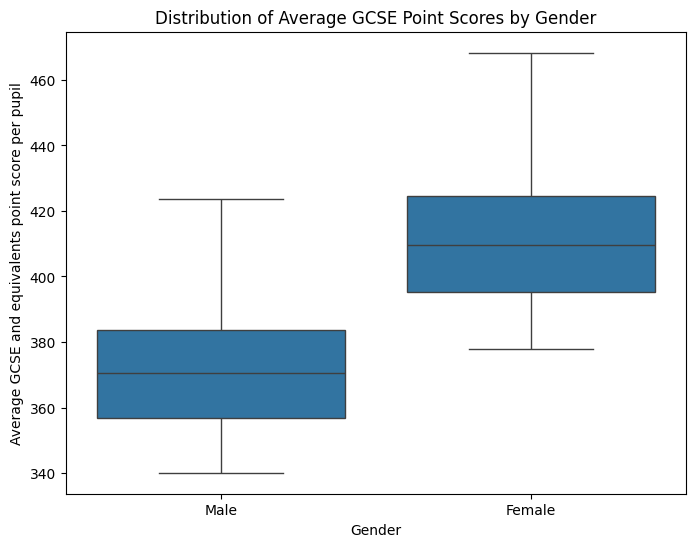

/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_71857/4009215760.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Gender', y='Average GCSE and equivalents point score per pupil', data=combined_df, ci='sd')


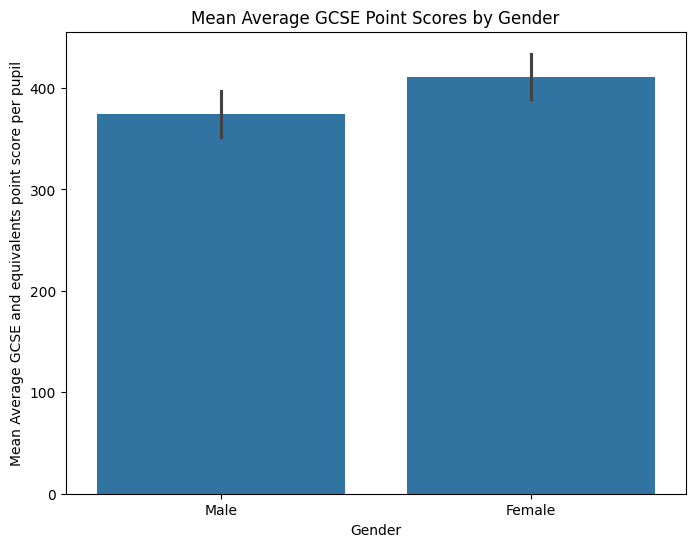

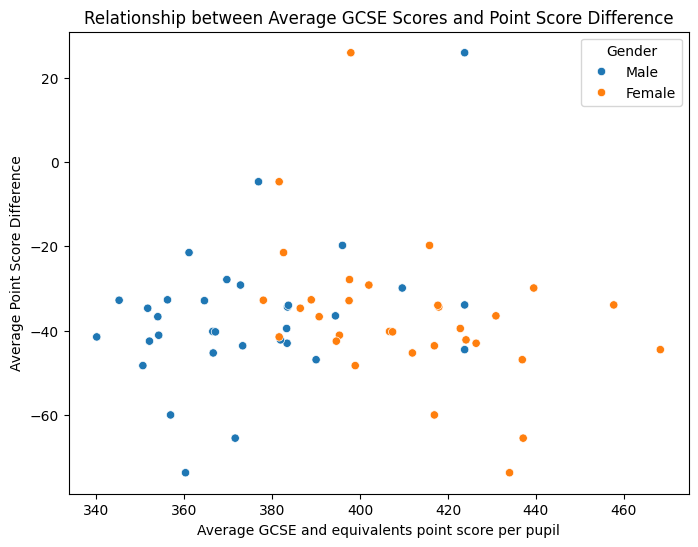

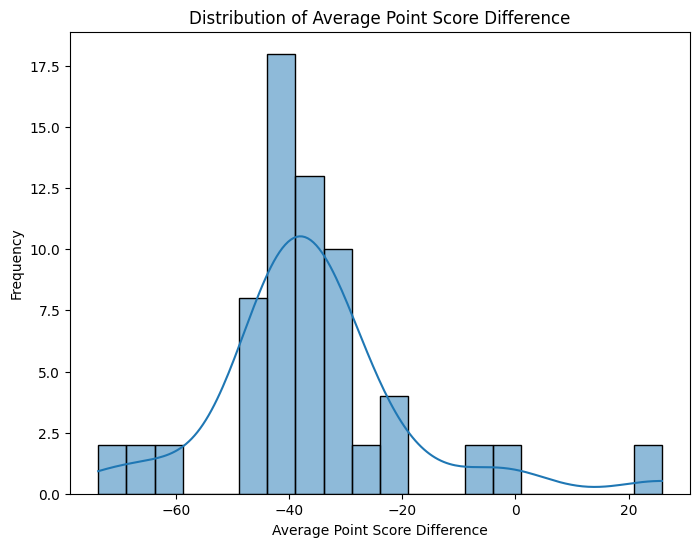

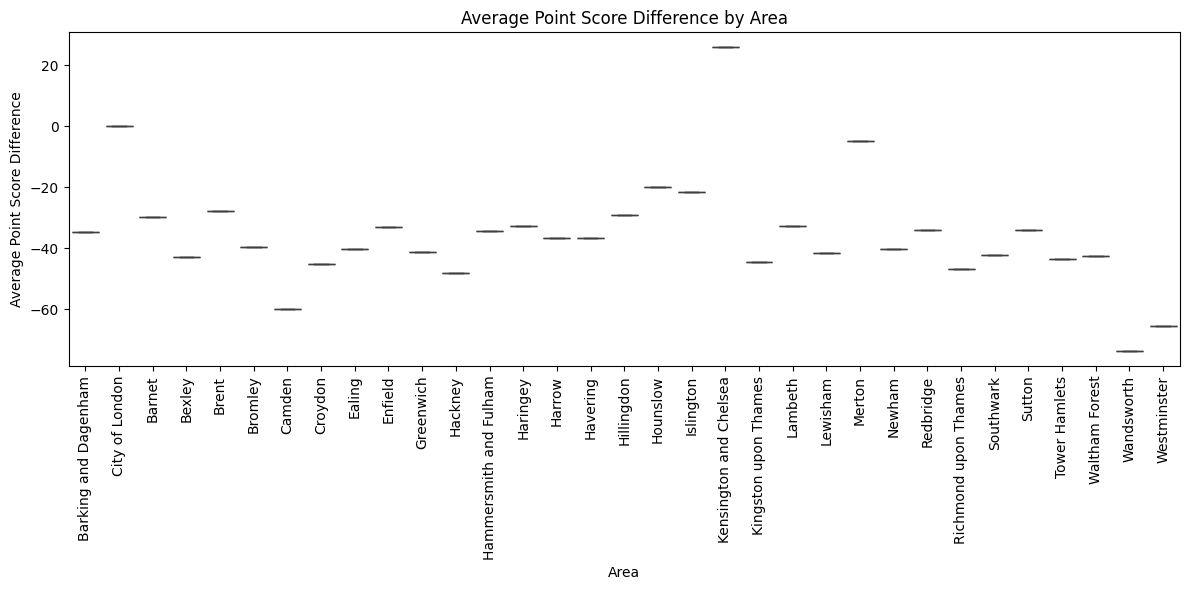

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box plot comparing 'Average GCSE and equivalents point score per pupil' for boys and girls
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Average GCSE and equivalents point score per pupil', data=combined_df)
plt.title('Distribution of Average GCSE Point Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average GCSE and equivalents point score per pupil')
plt.savefig('boxplot_scores.png')
plt.show()

# 2. Bar chart showing the mean 'Average GCSE and equivalents point score per pupil' for each gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Average GCSE and equivalents point score per pupil', data=combined_df, ci='sd')
plt.title('Mean Average GCSE Point Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Average GCSE and equivalents point score per pupil')
plt.savefig('barchart_means.png')
plt.show()

# 3. Scatter plot of 'Average GCSE and equivalents point score per pupil' vs 'Average Point Score Difference'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average GCSE and equivalents point score per pupil', y='Average Point Score Difference', hue='Gender', data=combined_df)
plt.title('Relationship between Average GCSE Scores and Point Score Difference')
plt.xlabel('Average GCSE and equivalents point score per pupil')
plt.ylabel('Average Point Score Difference')
plt.savefig('scatterplot_scores_difference.png')
plt.show()

# 4. Histogram of 'Average Point Score Difference' with KDE
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Average Point Score Difference'], kde=True)
plt.title('Distribution of Average Point Score Difference')
plt.xlabel('Average Point Score Difference')
plt.ylabel('Frequency')
plt.savefig('histogram_difference.png')
plt.show()

# 5. Box plot of 'Average Point Score Difference' across areas
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='Average Point Score Difference', data=combined_df)
plt.xticks(rotation=90)
plt.title('Average Point Score Difference by Area')
plt.xlabel('Area')
plt.ylabel('Average Point Score Difference')
plt.tight_layout()
plt.savefig('boxplot_difference_area.png')
plt.show()

## Summary:

### 1. Q&A

* **Are there significant differences in educational performance between boys and girls?** Yes, a t-test revealed a statistically significant difference (p-value: 1.52e-08) in average GCSE point scores between boys and girls, with girls having higher average scores (411.33) compared to boys (374.65).

* **What is the relationship between average GCSE scores and the average point score difference between genders?**  A scatter plot visualizes this relationship, showing how the average point score difference varies with average GCSE scores for both genders.  Further analysis would be needed to quantify this relationship.

* **How does the average point score difference vary across different areas?**  A box plot illustrates the distribution of 'Average Point Score Difference' across different areas, highlighting variations in gender-based performance disparities across geographical locations.


### 2. Data Analysis Key Findings

* **Statistically Significant Gender Difference in Scores:** A t-test showed a highly significant difference (p-value: 1.52e-08) in average GCSE point scores between boys (mean: 374.65) and girls (mean: 411.33).
* **Average Point Score Difference:** The mean difference in average point scores between boys and girls across all areas is -35.56, with a standard deviation of 17.71.  This indicates that, on average, girls outperformed boys by approximately 36 points.
* **Area-Specific Performance Disparities:** The 'Average Point Score Difference' varies considerably across different areas, suggesting that the gender gap in educational performance is not uniform across all locations.


### 3. Insights or Next Steps

* **Investigate Area-Specific Factors:**  Further analyze the areas with the largest positive and negative 'Average Point Score Differences' to identify potential socioeconomic, environmental, or school-related factors contributing to these disparities.
* **Explore Additional Performance Metrics:** Expand the correlation analysis to include other relevant numerical columns in the dataset (e.g., percentages achieving different GCSE grades) to get a more comprehensive understanding of the relationships between gender and educational performance.
